<a href="https://colab.research.google.com/github/Shreejan-git/pytorch-complete-course/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

In [2]:
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # converts a PIL Image or numpy.ndarray to tensor.

In [3]:
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [4]:
import matplotlib.pyplot as plt

##Getting the dataset

In [5]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # how do we wasnt to transform the data?
    target_transform=None # how do we want to tansform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16014347.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272083.84it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5064889.38it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19007286.08it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [8]:
label

9

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
#shape of the first-index image
image.shape # pytorch represents an image in [channel, height, width] order.

torch.Size([1, 28, 28])

In [12]:
label

9

(-0.5, 27.5, 27.5, -0.5)

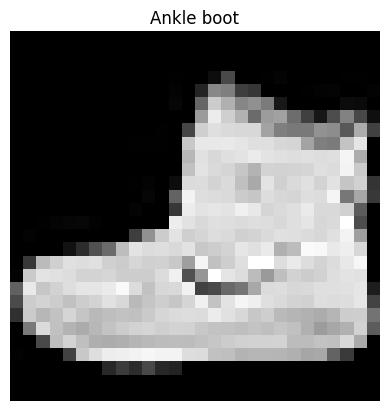

In [15]:
# plt.imshow(image) If we simple run this code, it will throw an error: TypeError: Invalid shape (1, 28, 28) for image data
# this is because, Pytorch represents in [c,h,w] but matplotlib expects in either[h,w,c] or only [h,w] order
plt.imshow(image.squeeze(), cmap='gray') # squeeze will remove the 1-dimension
plt.title(class_names[label])
plt.axis(False)


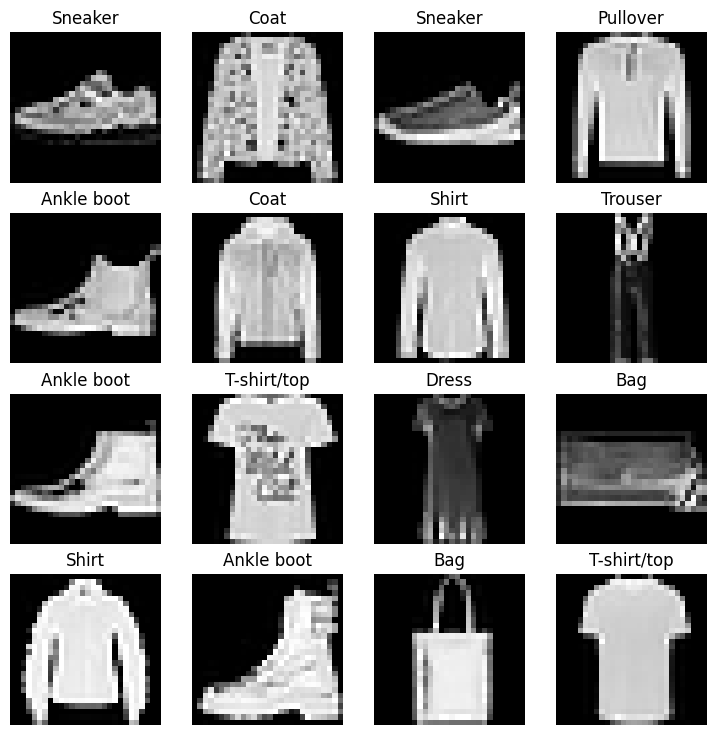

In [18]:
fig = plt.figure(figsize=(9,9))
rows, cols=4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

DataLoader resources: https://pytorch.org/docs/stable/data.html

https://blog.paperspace.com/dataloaders-abstractions-pytorch/


In [19]:
# turn train dataset into DataLoader
from torch.utils.data import DataLoader # creates the python iterable over the dataset.

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False
)
train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f0fa7fe8ca0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0fa7fe9a80>)

In [21]:
print(f"There are {len(train_dataloader)} batches of images with batch size of {BATCH_SIZE}")
print(f"There are {len(test_dataloader)} batches of images with batch size of {BATCH_SIZE}")

There are 1875 batches of images with batch size of 32
There are 313 batches of images with batch size of 32
